# KNN

## 1. load dataset

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]

In [4]:
y = iris.target

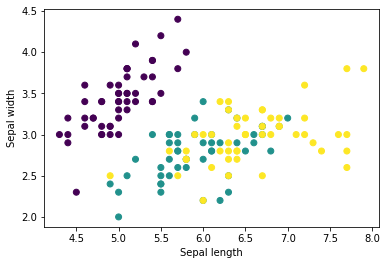

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

## 2. train KNN

In [6]:
def my_train_test_split(X, y, test_size = 0.2, random_state = None):
    if random_state:
        np.random.seed(random_state)

    size = len(X) 
    shuffle_indices = np.random.permutation(size)

    test_scale = int(size * test_size)

    test_indices = shuffle_indices[:test_scale]
    train_indices = shuffle_indices[test_scale:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [7]:
X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_size=0.33, random_state=5054)

In [8]:
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def my_counter(arr):
    dict = {}
    for i in arr:
        if i in dict:
            dict[i] += 1
        else:
            dict[i] = 1
    
    tmp = list(dict.items())
    tmp.sort(key=lambda x:x[1], reverse=True)
    return tmp[0][0]

def KNN_classifier(X_train, y_train, x_test, k):
    dists = [euc_dist(x, x_test) for x in X_train]
    nearest_indices = np.argsort(dists)[:k]

    return my_counter(y_train[nearest_indices])

In [9]:
preds = [KNN_classifier(X_train, y_train, x_test, 3) for x_test in X_test]

In [10]:
accuracy = sum(y_test == preds)/len(y_test)
print(f"Accuracy is: {accuracy}.")

Accuracy is: 0.7346938775510204.
